<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [117]:
# insert code here
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import keras
from keras.layers import Dense

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [118]:
# insert code here
from sklearn.datasets import load_diabetes

### Prepare input data

In [119]:
# insert code here
diabetes = load_diabetes()

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [120]:
# Put data into features and target
X = diabetes.data
y = diabetes.target

### Split the data (training/test)

In [121]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Create the model's architecture

In [132]:
# insert code here
# Set up architecture
model = keras.models.Sequential()

In [133]:
# Add layers
model.add(Dense(100, activation = 'relu', input_shape = (X_train.shape[1], )))
model.add(Dense(50, activation = 'relu'))

# Add the output layer
model.add(Dense(1, activation = 'linear'))

print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 100)               1100      
                                                                 
 dense_56 (Dense)            (None, 50)                5050      
                                                                 
 dense_57 (Dense)            (None, 1)                 51        
                                                                 
Total params: 6,201
Trainable params: 6,201
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [137]:
# insert code here
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = 'mean_squared_error')

### Fit the training data

In [138]:
%%time
# insert code here
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 32,
    epochs = 150,
    verbose = 1)

Epoch 1/150
9/9 [==============================] - 1s 20ms/step - loss: 27163.7539 - mean_squared_error: 27163.7539 - val_loss: 32250.6211 - val_mean_squared_error: 32250.6211
Epoch 2/150
9/9 [==============================] - 0s 6ms/step - loss: 27139.8555 - mean_squared_error: 27139.8555 - val_loss: 32220.7422 - val_mean_squared_error: 32220.7422
Epoch 3/150
9/9 [==============================] - 0s 9ms/step - loss: 27109.3535 - mean_squared_error: 27109.3535 - val_loss: 32177.0176 - val_mean_squared_error: 32177.0176
Epoch 4/150
9/9 [==============================] - 0s 5ms/step - loss: 27062.6914 - mean_squared_error: 27062.6914 - val_loss: 32110.5273 - val_mean_squared_error: 32110.5273
Epoch 5/150
9/9 [==============================] - 0s 7ms/step - loss: 26994.2734 - mean_squared_error: 26994.2734 - val_loss: 32008.7363 - val_mean_squared_error: 32008.7363
Epoch 6/150
9/9 [==============================] - 0s 5ms/step - loss: 26886.6621 - mean_squared_error: 26886.6621 - val_los

### Create predictions

In [139]:
# insert code here
predictions = model.predict(X_test)
predictions

array([[233.92848 ],
       [128.67075 ],
       [161.34544 ],
       [138.49689 ],
       [123.55881 ],
       [258.2963  ],
       [ 89.272385],
       [ 73.951164],
       [226.72694 ],
       [ 98.53855 ],
       [225.03421 ],
       [153.50853 ],
       [133.01013 ],
       [187.16014 ],
       [176.77534 ],
       [273.88977 ],
       [184.08832 ],
       [128.16705 ],
       [163.1556  ],
       [ 95.58644 ],
       [178.40489 ],
       [ 59.46683 ],
       [ 83.81459 ],
       [ 64.892334],
       [289.74872 ],
       [130.36385 ],
       [268.22537 ],
       [162.92079 ],
       [115.893326],
       [155.28792 ],
       [104.96344 ],
       [ 79.44652 ],
       [285.9435  ],
       [100.1805  ],
       [ 75.85031 ],
       [ 74.66315 ],
       [134.62244 ],
       [153.56111 ],
       [151.27734 ],
       [120.350464],
       [203.4691  ],
       [171.85612 ],
       [129.78294 ],
       [224.4941  ],
       [ 78.30409 ],
       [ 94.62903 ],
       [ 59.955082],
       [138.4

### Evaluate the model

In [140]:
# insert code here
score = model.evaluate(X_test, y_test, batch_size = X_test.shape[0])
print(score)
print('\nTest loss: %.6f' % score[0])

1/1 [==============================] - 0s 313ms/step - loss: 2758.2183 - mean_squared_error: 2758.2183
[2758.21826171875, 2758.21826171875]

Test loss: 2758.218262


### Visualisation of cost

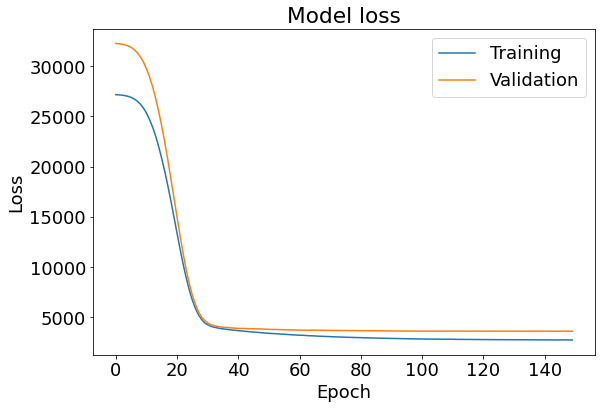

In [141]:
# insert code here
plt.figure( figsize = (9, 6))
plt.rcParams.update({'font.size': 18})

# Plot training & validation loss values
plt.plot(history.history['loss'], label = 'Training')
plt.plot(history.history['val_loss'], label = 'Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

### Visualisation of residuals

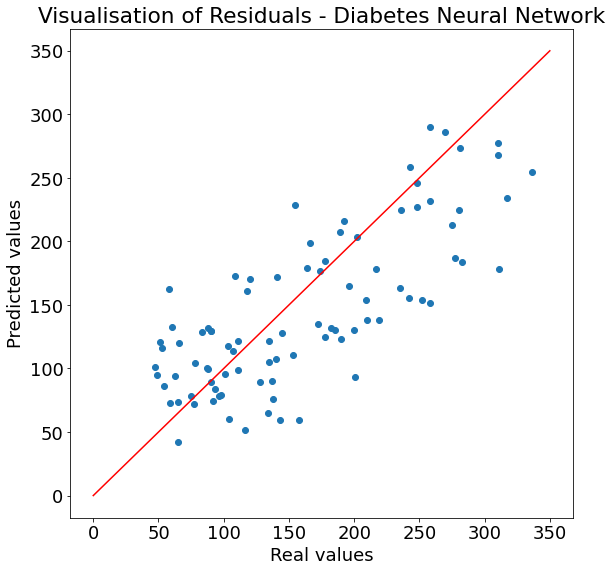

In [151]:
# insert code here
plt.figure( figsize = (9, 9))
plt.rcParams.update({'font.size': 18})

# Plot training & validation loss values
plt.plot([0,350], [0,350], 'r-')
plt.scatter(x=y_test, y=predictions)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Visualisation of Residuals - Diabetes Neural Network')

plt.show()



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



